PyImageJ Tutorial
===

This notebook covers how to use ImageJ as a library from Python. A major advantage of this approach is the ability to combine ImageJ with other tools available from the Python software ecosystem, including NumPy, SciPy, scikit-image, CellProfiler, OpenCV, ITK and more.

This notebook assumes familiarity with the ImageJ API. Detailed tutorials in that regard can be found in the other notebooks.

## 4 Send an ImageJ image into xarray.DataArray: `ij.py.from_java`

`from_java` works in reverse of `to_java` and can be used to further process ImageJ data types with xarray, NumPy, scikit-image, etc. 

First let's initialize ImageJ and open an image from a URL with ImageJ and convert it into Python object. In thise case an `xarray.DataArray`.

ImageJ version: 2.3.0/Inactive
[INFO] Populating metadata


[java.lang.Enum.toString] [INFO] Populating metadata
[java.lang.Enum.toString] [INFO] Populating metadata
[java.lang.Enum.toString] [INFO] Populating metadata


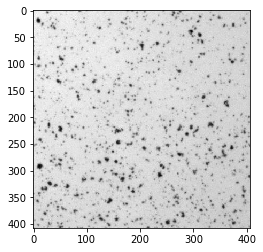

In [7]:
import imagej

# initialize imagej
ij = imagej.init(mode='interactive')
print(f"ImageJ version: {ij.getVersion()}")

# Load the image
url_colony = 'https://wsr.imagej.net/images/Cell_Colony.jpg'
cell_colony = ij.io().open(url_colony)

# Send the image to Python
xr_colony = ij.py.from_java(cell_colony)

# Display the image
ij.py.show(xr_colony, cmap='gray')

### Special Consideration: RGB and other axis conventions

NumPy/scikitimage is reverse indexed from ImageJ, e.g. the preferred axis order in NumPy/scikitimage is [t, pln, row, col, ch] and in ImageJ (by default) its [X, Y, Channel, Z, Time]. In addition, NumPy and matplotlib have a limited understanding of axis conventions and only natively handle 3-channel RGB images as [Y, X, C] or [row, col, ch]. To handle this, ImageJ images are converted to `xarray.DataArray`, with axes retaining their metadata and properly re-ordered.


In [8]:
import skimage
import numpy as np

# load the image into IJ
ij_img = skimage.data.astronaut()

# Convert the image to a numpy array
img_from_ij = ij.py.from_java(ij_img)

np.shape(img_from_ij)

(512, 512, 3)

Note that the channel dimension comes last. The image can be plotted diretly:

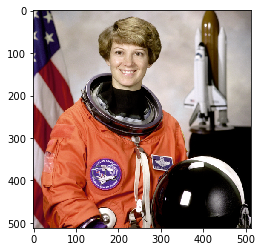

In [9]:
# Hint: There are two barriers to plotting the image: the axis order, and that matplotlib only plot 8-bit RGB images
# convert to 8-bit
img_as_8bit = img_from_ij.astype(int)
# plot the image (xarr)
ij.py.show(img_as_8bit)